In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
    'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
df = pd.read_csv('data/pima-indians-diabetes.csv', names = column_names , header= None, skiprows = 9)
#removing the unwanted values by changing to numeric values
df = df[pd.to_numeric(df['Pregnancies'], errors='coerce').notnull()]
df.reset_index(drop=True, inplace=True)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


In [3]:
df = df.dropna()

In [4]:
X = df.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = df['Outcome']  # Target variable (Outcome)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
dt_classifier = DecisionTreeClassifier(random_state=42)


In [7]:
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = dt_classifier.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 74.68%

Confusion Matrix:
[[75 24]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



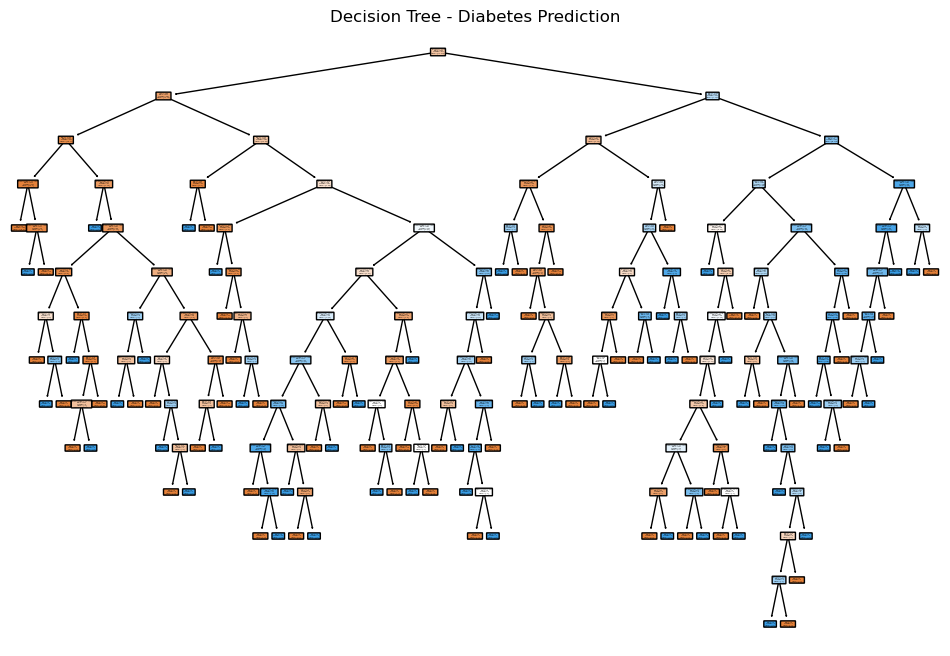

In [10]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title("Decision Tree - Diabetes Prediction")
plt.show()


In [11]:
random_sample = X_test.sample(1)  # Pick a random sample from the test set
random_sample_prediction = dt_classifier.predict(random_sample)  # Predict the outcome for this sample

# Print the random sample and its prediction
print("\nRandom Sample Prediction:")
print(random_sample)
print(f"Prediction (1 = Diabetes, 0 = No Diabetes): {random_sample_prediction[0]}")


Random Sample Prediction:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
101            1      151             60              0        0  26.1   

     DiabetesPedigree  Age  
101             0.179   22  
Prediction (1 = Diabetes, 0 = No Diabetes): 0
